In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import DataIngest
from utils import DataProcessing

if __name__ == "__main__":
    data_ingest = DataIngest("./data/Advertising.csv")

    X, y, df = data_ingest.get_X_y()
    df.to_csv("./data/simple_df.csv",index=False)
    # print(X, y, df)

Figure(640x480) Axes(0.125,0.11;0.775x0.77)
        TV  Sales
0    230.1   22.1
1     44.5   10.4
2     17.2    9.3
3    151.5   18.5
4    180.8   12.9
..     ...    ...
195   38.2    7.6
196   94.2    9.7
197  177.0   12.8
198  283.6   25.5
199  232.1   13.4

[200 rows x 2 columns]


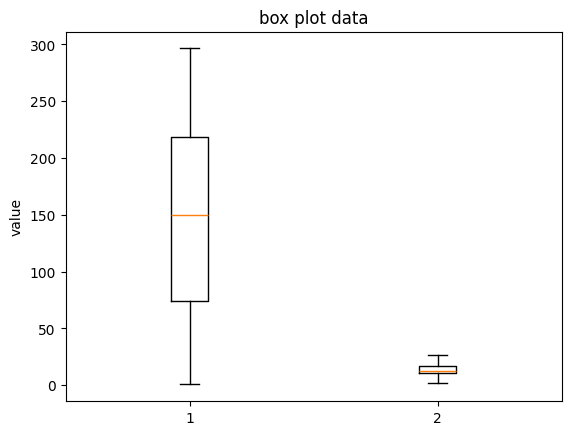

<Figure size 640x480 with 0 Axes>

In [ ]:
data_process = DataProcessing(df)
data_process.identify_outliers(df)

In [ ]:
tv_outliers = data_process.identify_outliers_zscore(df['TV'])
print(tv_outliers)

Series([], Name: TV, dtype: float64)


In [ ]:
from utils import SimpleLinearRegression
simple_model = SimpleLinearRegression(X, y)
model = simple_model.summary()
model.save("./models/first.txt")


# https://www.geeksforgeeks.org/machine-learning/interpreting-the-results-of-linear-regression-using-ols-summary/


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 28 Jun 2025   Prob (F-statistic):           1.47e-42
Time:                        13:32:36   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [ ]:
# Predict
new_X_predict = pd.DataFrame({
    "const": [1],
    "TV": [234]
})
import statsmodels.api as sm
trained_model = sm.load("./models/first.txt")
prediction = trained_model.predict(new_X_predict)
print("after load")
print( prediction)

after load
0    18.156167
dtype: float64


##### before load -> 
0    18.156167
dtype: float64

# Assumptions
